In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

sns.set_theme(font_scale=1.3)
np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris
all_data = load_iris(as_frame=True)

df = all_data.frame
feature_names = all_data.feature_names

X_2D = all_data.data.iloc[:, [0, 1]] 
y_2D = all_data.target

In [3]:
from sklearn.model_selection import train_test_split

X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(
    X_2D, y_2D, random_state=42, stratify=y_2D
)



In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
from sklearn.ensemble import RandomForestClassifier

classifier_2D = RandomForestClassifier(n_estimators=100, random_state=42)

classifier_2D.fit(X_train_2D, y_train_2D)



RandomForestClassifier(random_state=42)

In [6]:
score_test = classifier_2D.score(X_test_2D, y_test_2D)
print(f'Test data score: {score_test:.4f}')


Test data score: 0.6316


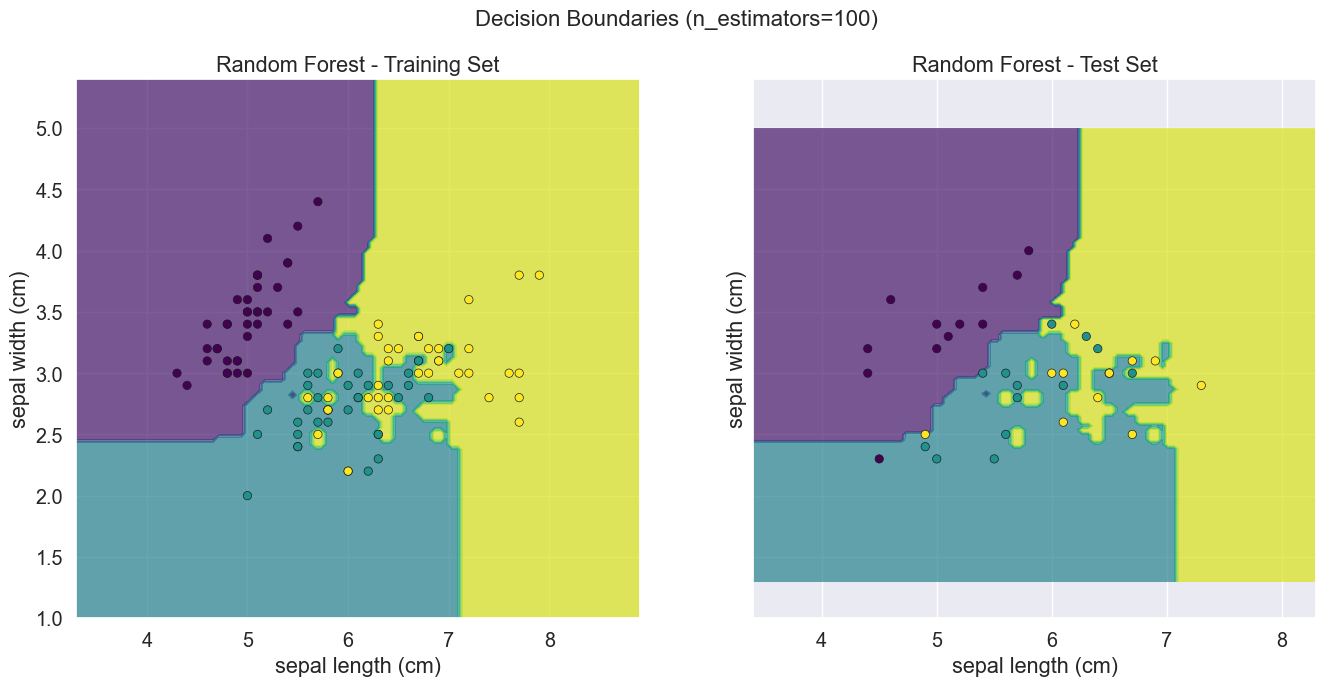

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Plot 1: Training Set
DecisionBoundaryDisplay.from_estimator(
    classifier_2D,
    X_train_2D,
    cmap='viridis',
    alpha=0.7,
    ax=ax1,
    response_method="predict",
    xlabel=feature_names[0],
    ylabel=feature_names[1]
)

sns.scatterplot(x=X_train_2D.iloc[:, 0], y=X_train_2D.iloc[:, 1], 
                hue=y_train_2D, palette='viridis', legend=False, ax=ax1, 
                edgecolor='k')
ax1.set_title('Random Forest - Training Set')


# Plot 2: Test Set
DecisionBoundaryDisplay.from_estimator(
    classifier_2D,
    X_test_2D,
    cmap='viridis',
    alpha=0.7,
    ax=ax2,
    response_method="predict",
    xlabel=feature_names[0],
    ylabel=feature_names[1]
)
sns.scatterplot(x=X_test_2D.iloc[:, 0], y=X_test_2D.iloc[:, 1], 
                hue=y_test_2D, palette='viridis', legend=False, ax=ax2, 
                edgecolor='k')
ax2.set_title('Random Forest - Test Set')

plt.suptitle('Decision Boundaries (n_estimators=100)', fontsize=16)
plt.show()

In [8]:
all_data = load_iris(as_frame=True)

X = all_data.data
y = all_data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, 
                                                    stratify=y)




classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.9210526315789473

In [10]:
classifier.feature_importances_

array([0.11504762, 0.02402532, 0.43276876, 0.42815829])

In [11]:
features = pd.DataFrame(data={'feature':feature_names, "feature_importance":classifier.feature_importances_})

px.bar(features, x="feature", y="feature_importance", width=700, height=400)